# Code Louisville Python Project

## Download the Data

In [1]:
from pathlib import Path
from subprocess import call

# Call to shell: kaggle dataset download using kaggle python package
call("kaggle datasets download -d cjgdev/formula-1-race-data-19502017", shell=True)
# Path for zip file 
d = Path('formula-1-race-data-19502017.zip')
# Verify the zip directory was downloaded
print("Download of {} {}.".format(d, "was successful" if d.exists() else "has failed"))

Download of formula-1-race-data-19502017.zip was successful.


## Extract the Files

In [2]:
import zipfile
from pathlib import Path
import os

# Open file for extraction and give it a name
with zipfile.ZipFile('formula-1-race-data-19502017.zip', 'r') as zipper:
    # Set path variable
    z = Path('formula-1-race-data')
    # Extract file in directory
    zipper.extractall(z)
    # Verify extracted directory exists, and is not empty
    print("Extraction of {} {}.".format(z, "has failed" if len(os.listdir(z)) == 0 else "was successful"))

Extraction of formula-1-race-data was successful.


## Create and Insert SQL Statements

In [3]:
import os
import codecs
import subprocess
import csvkit
import sqlite3
from sqlite3 import dbapi2 as sqlite
from pathlib import Path

# Extracte file path
xtract_path = Path('formula-1-race-data')
# DB name
dbnm = str(xtract_path) + '.sqlite'

# Loop through list of extracted files
for i in os.listdir(xtract_path):
    # Full file path
    full_path = str(xtract_path) + '/' + i
    # Just the filename
    filename = i.replace('.csv', '')
    # Encoding errors with 2 files, this codec resolves and processes 84% of the files
    # 2 missing files are races.csv and qualifying.csv
    o = codecs.open(str(full_path), encoding='latin-1')
    # csvsql command with sql file created before 
    command = 'csvsql --db sqlite+pysqlite:///' + dbnm + ' --insert ' + str(full_path) + ' --tables ' + filename + ' -e latin-1'
    # Process csv into sql and insert data
    p = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = p.communicate()
    # Close file to end process
    p.stdout.close()
    # Close codec
    o.close()
# Completion message    
print('The database {} has been created'.format(dbnm))

The database formula-1-race-data.sqlite has been created


## Perform Multi-Table Query and Make Table

In [6]:
import os
import sqlite3
import pandas as pd

# Get the name of the sqlite file
for i in os.listdir('./'):
    if '.sqlite' in i:
        filename = i

con = sqlite3.connect(str(filename))
qry = "select distinct results.raceId, results.driverId, results.position, drivers.driverRef, status.status, results.fastestLapSpeed from results left join drivers on results.driverId = drivers.driverId inner join status on results.statusId = status.statusId where results.driverId in (30, 1, 20) and results.fastestLapTime!='None'"
res = pd.read_sql_query(sql=qry, con=con)
res

,raceId,driverId,position,driverRef,status,fastestLapSpeed
0,18,1,1.0,hamilton,Finished,218.3
1,19,1,5.0,hamilton,Finished,209.033
2,19,20,NaN,vettel,Engine,205.995
3,20,1,13.0,hamilton,+1 Lap,203.969
4,21,1,3.0,hamilton,Finished,204.323
5,22,1,2.0,hamilton,Finished,222.085
6,22,20,17.0,vettel,+1 Lap,217.926
7,23,1,1.0,hamilton,Finished,153.152
8,23,20,5.0,vettel,Finished,152.614
9,24,20,8.0,vettel,Finished,199.913


## Perform Query and Create Map

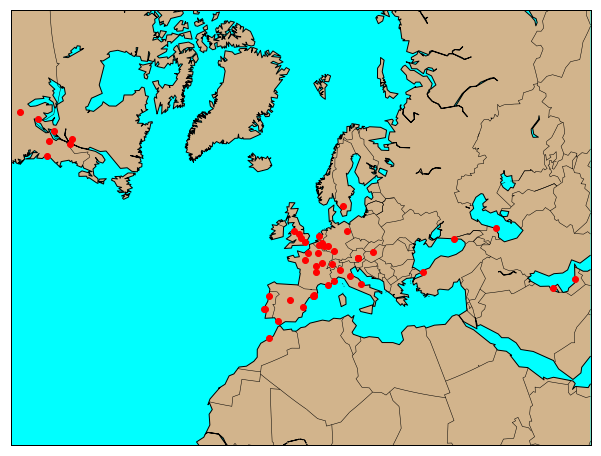

In [7]:
import os
import sqlite3
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Get the name of the sqlite file
for i in os.listdir('./'):
    if '.sqlite' in i:
        filename = i

con = sqlite3.connect(str(filename))
cursor = con.cursor()
qry="SELECT lng, lat FROM circuits;"
crds = cursor.execute(qry)

plt.figure(figsize=(15,8))
map = Basemap(width=12000000,height=9000000, projection='lcc', lon_0=-1,lat_0=54)
map.drawmapboundary(fill_color='aqua')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='tan',lake_color='aqua')
map.drawcoastlines()
map.drawcountries()

for a, b in crds:
    x, y = map(a, b)

    map.plot(x, y, marker='o',color='r')

plt.show()